# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [8]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [9]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/BigAnalysis'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()

Loading Data from ./Data/BigAnalysis
---- Dataset Label Distribution ----
Negative Samples: 6782
False Positive Samples: 242
Positive Samples: 1004

---- Well Content Distribution: ----
Data Wells: 7044
Control Wells: 984


[6782, 242, 1004, 984, 7044]

## Unsupervised
### KMeans

In [10]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [11]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Metrics', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [12]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', random_state = 30, model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [13]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

\MLP Model Loaded:
<class 'keras.src.engine.functional.Functional'>


## Training and Evaluation

### Training

In [14]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7024
         pos       0.92      0.43      0.59      1004

    accuracy                           0.92      8028
   macro avg       0.92      0.71      0.77      8028
weighted avg       0.92      0.92      0.91      8028

KMeans Metrics:
              precision    recall  f1-score   support

         neg       0.93      0.97      0.95      7024
         pos       0.70      0.48      0.57      1004

    accuracy                           0.91      8028
   macro avg       0.81      0.73      0.76      8028
weighted avg       0.90      0.91      0.90      8028

Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95      7024
         pos       0.60      0.97      0.74      1004

    accuracy                           0.91      8028
   macro avg       0.80      0.94      0.84      8028
weighted avg       0.95      0.9

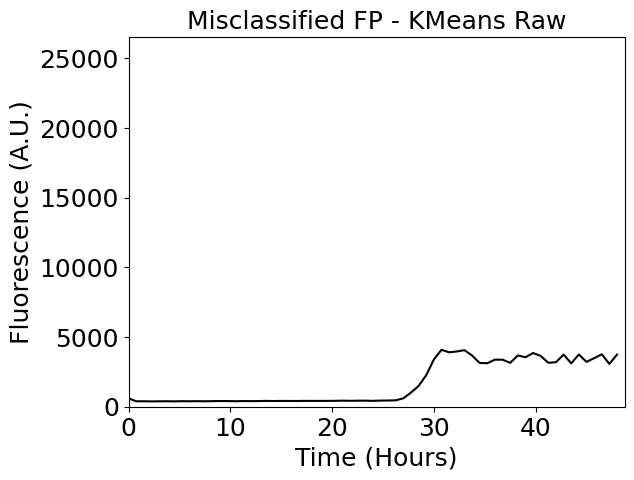

-------- Results on False Positives for KMeans Metrics --------
Accuracy on False Positives: 0.1322314049586777
False Positives Account for 28.69% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 37.793190476190475
Average RAF: 0.028073490304761906
Average MPR: 6.267207797076192
Average MS: 483.2916666666667
Correctly Classified FP Characteristics:
Average Time to Threshold: 21.65625
Average RAF: 0.0629361750625
Average MPR: 19.98175239203125
Average MS: 1522.453125


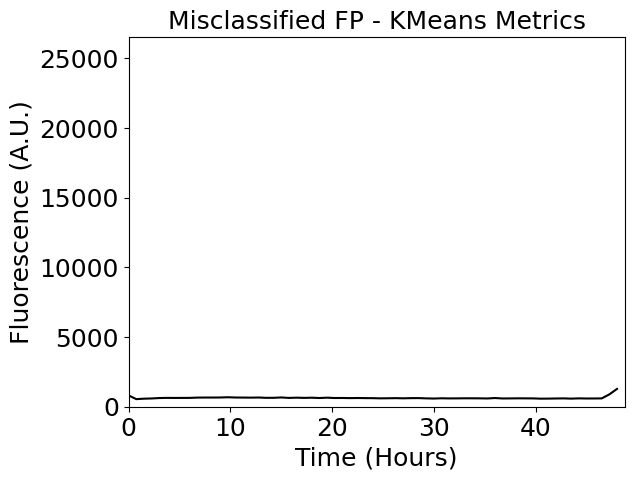

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.23140495867768596
False Positives Account for 26.96% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.431827956989245
Average RAF: 0.03474035737096774
Average MPR: 9.268021261155914
Average MS: 725.266129032258
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.058035714285715
Average RAF: 0.02585150169642857
Average MPR: 4.137102845642858
Average MS: 273.39732142857144


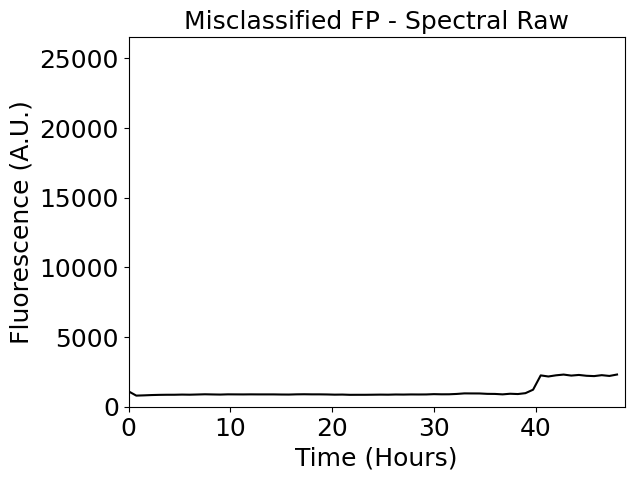

-------- Results on False Positives for Spectral Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 4.25% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.65938016528926
Average RAF: 0.03268343209090909
Average MPR: 8.080701297235537
Average MS: 620.7014462809917
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


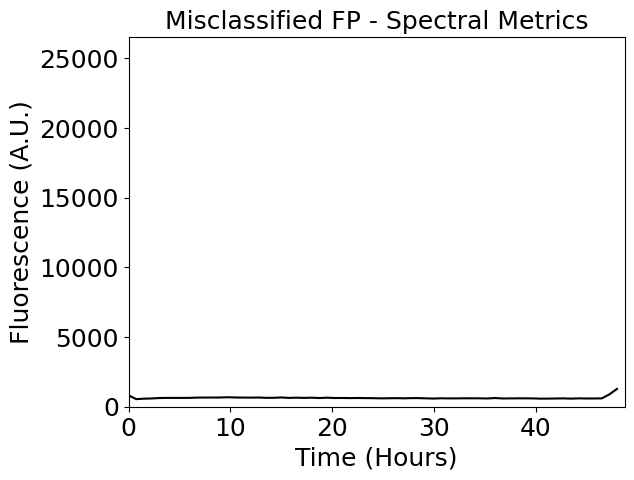

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75


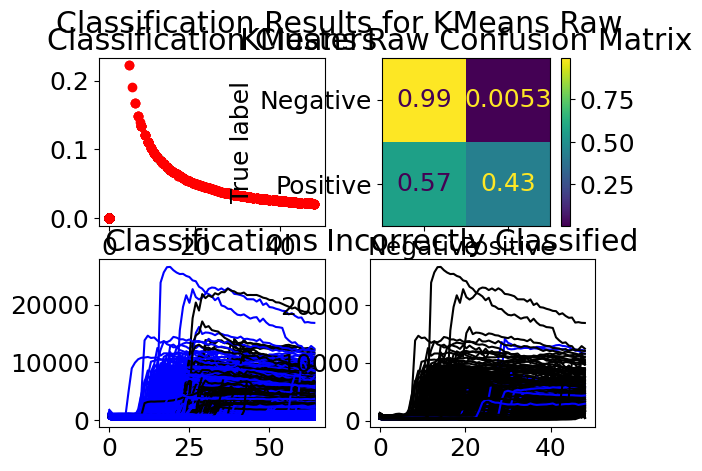

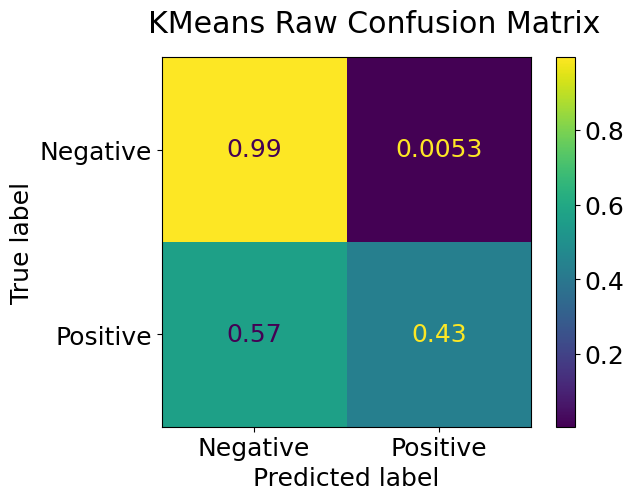

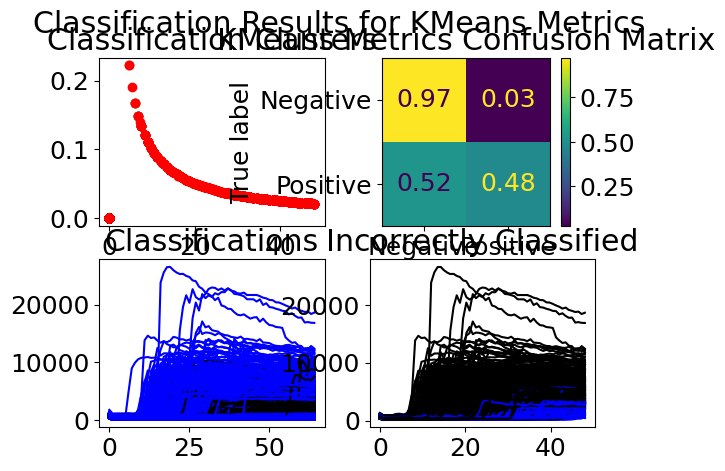

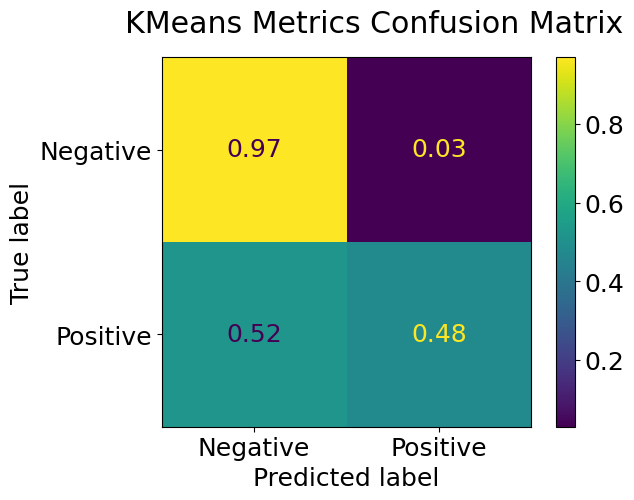

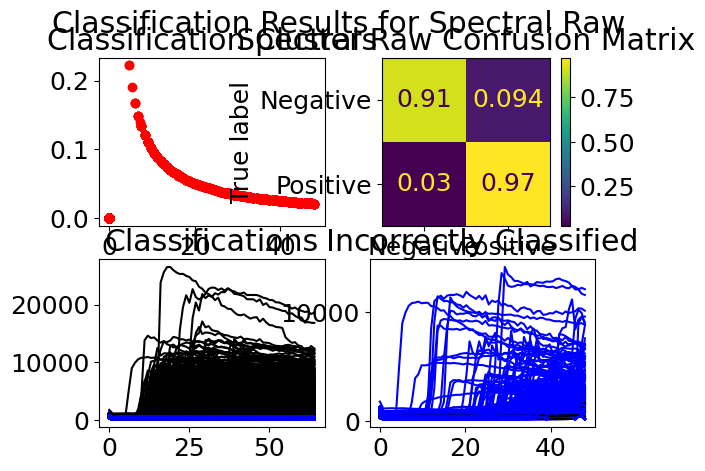

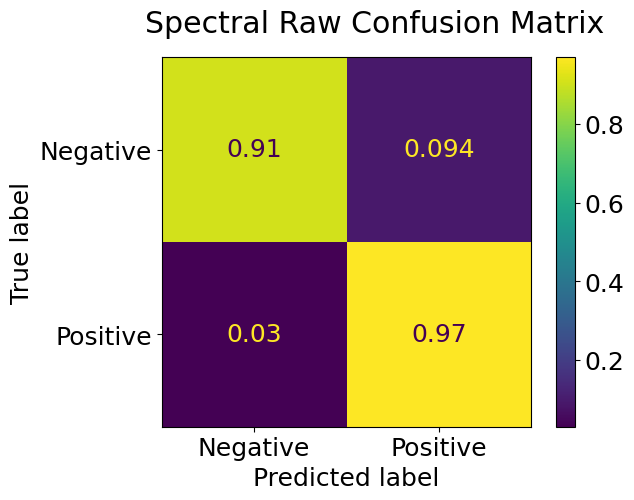

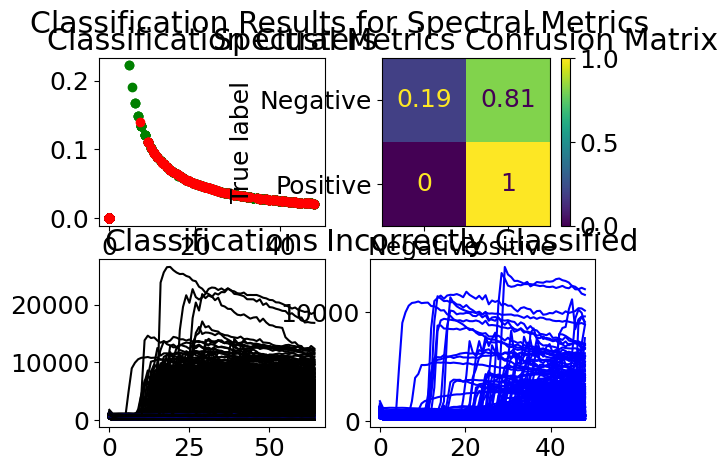

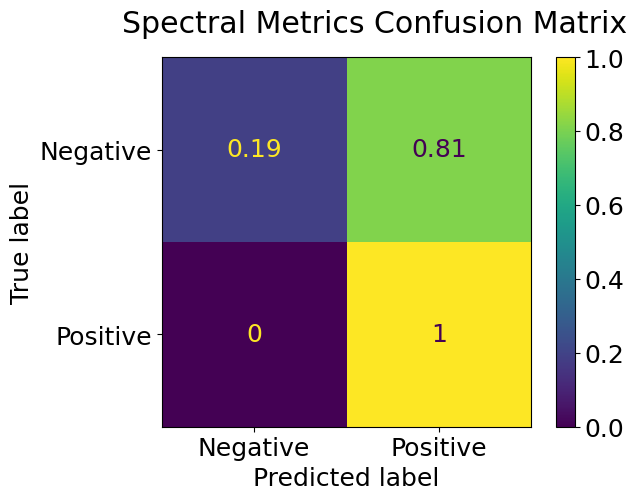

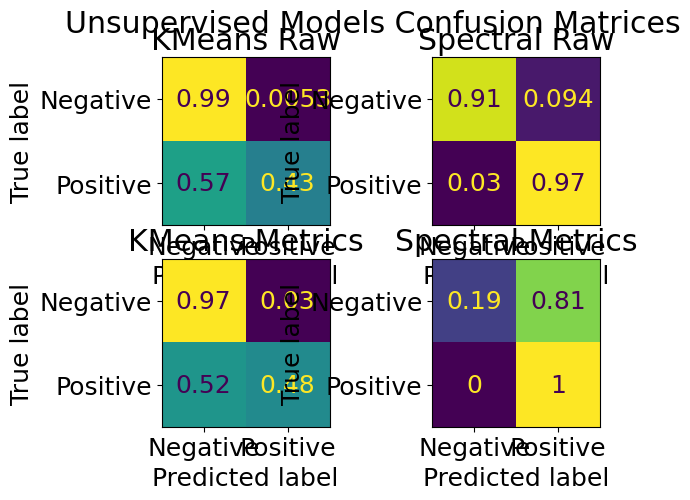

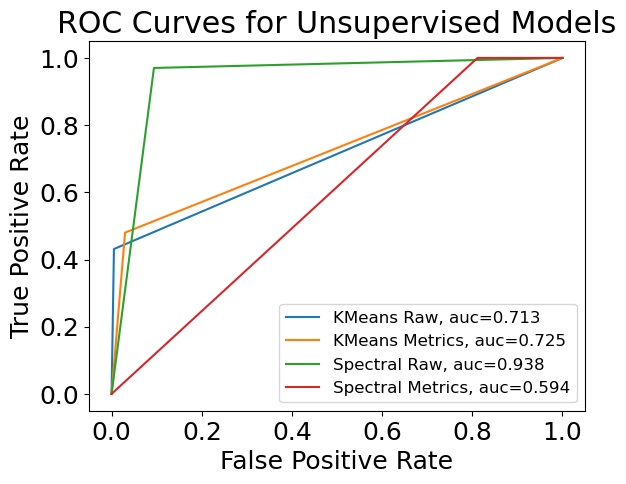

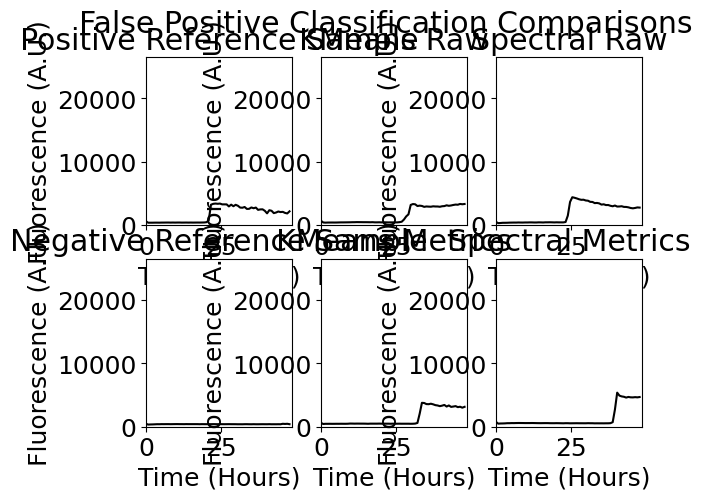

In [16]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       715
         pos       0.82      0.95      0.88        87

    accuracy                           0.97       802
   macro avg       0.91      0.96      0.93       802
weighted avg       0.98      0.97      0.97       802

SVM Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       715
         pos       0.79      0.97      0.87        87

    accuracy                           0.97       802
   macro avg       0.89      0.97      0.92       802
weighted avg       0.97      0.97      0.97       802

26/26 [==============================] - 0s 1ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.97      0.99      0.98       715
         pos       0.90      0.72      0.80        87

    accuracy                           0.96       802
   macro avg       0.93      0.86      0.89 

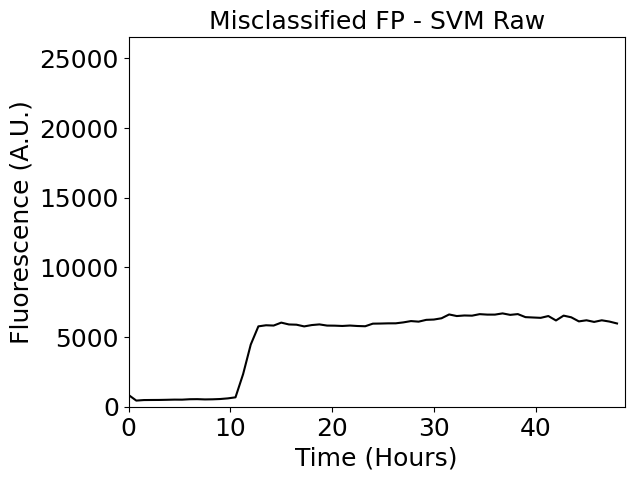

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.20689655172413793
False Positives Account for 88.46% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.619565217391305
Average RAF: 0.035641539347826094
Average MPR: 8.690876857652173
Average MS: 704.7608695652174
Correctly Classified FP Characteristics:
Average Time to Threshold: 42.75
Average RAF: 0.023797770833333332
Average MPR: 4.5946999885
Average MS: 331.875


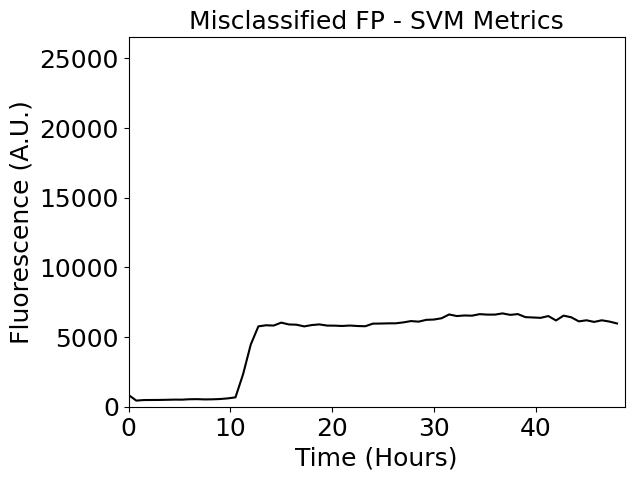

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 1ms/step
Accuracy on False Positives: 0.7586206896551724
False Positives Account for 22.58% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 24.75
Average RAF: 0.04989552585714285
Average MPR: 14.97062357942857
Average MS: 1234.107142857143
Correctly Classified FP Characteristics:
Average Time to Threshold: 38.93181818181818
Average RAF: 0.027876061318181822
Average MPR: 5.575636481863636
Average MS: 434.6363636363636


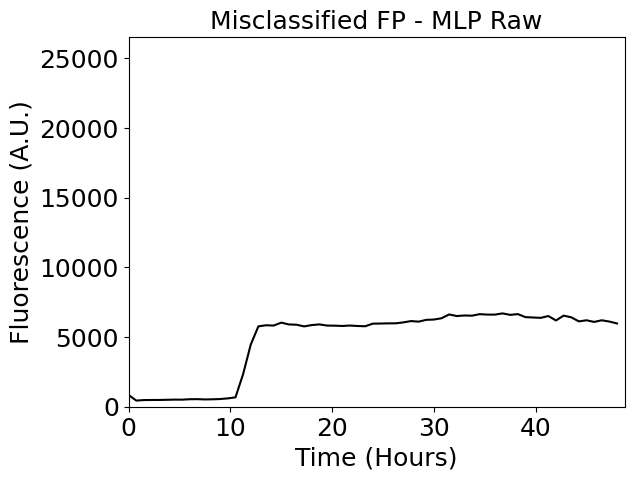

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75
26/26 [==============================] - 0s 1ms/step


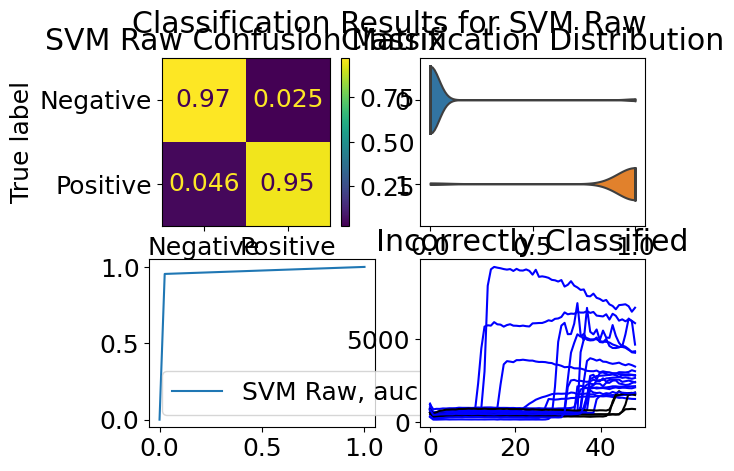

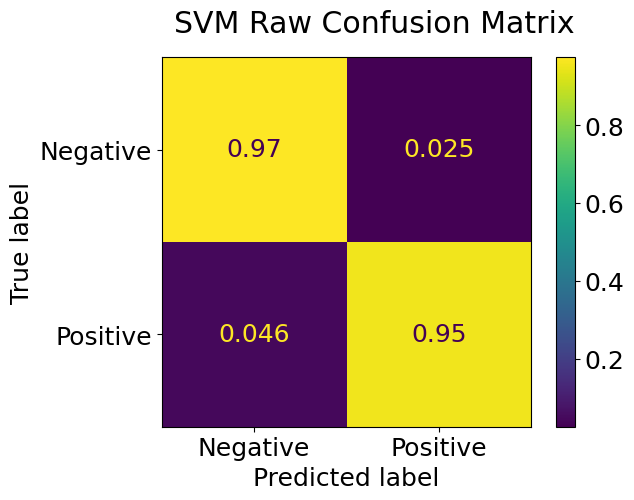

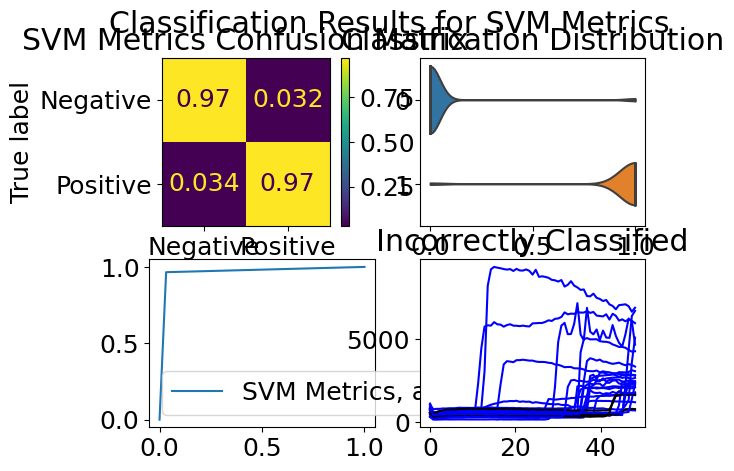

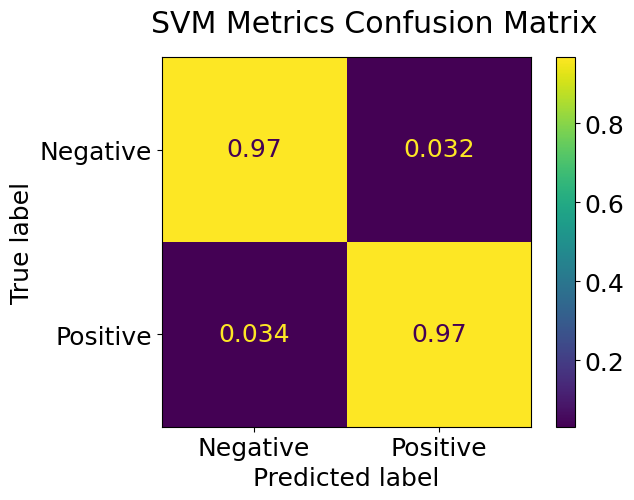

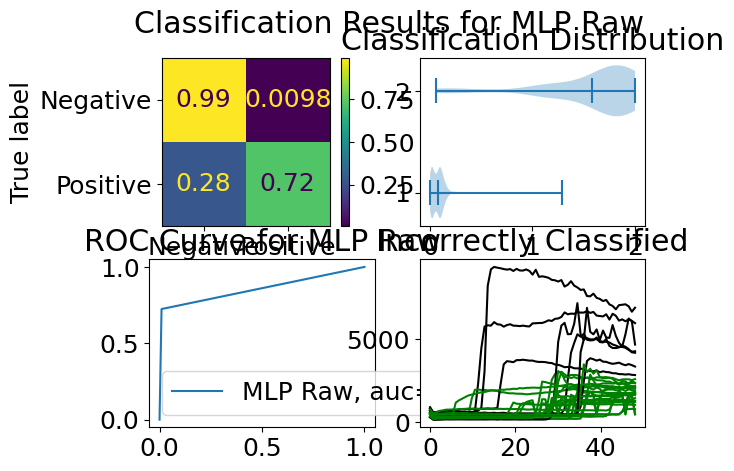

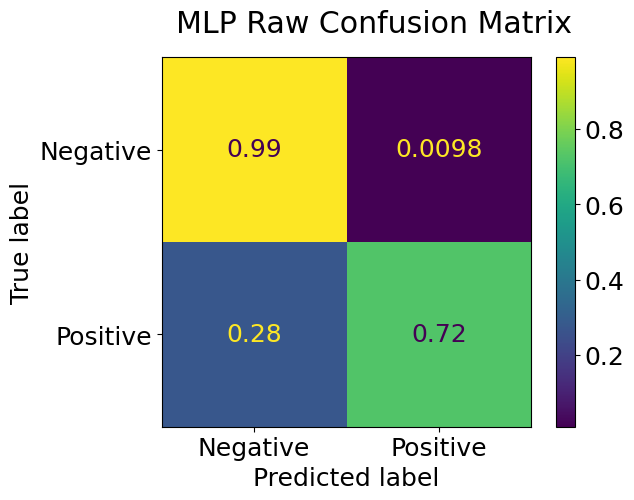

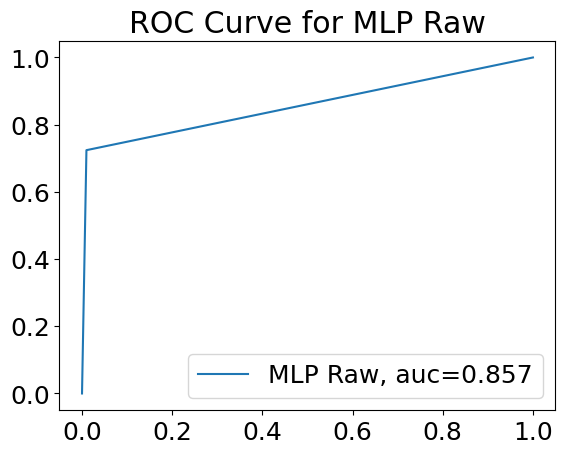

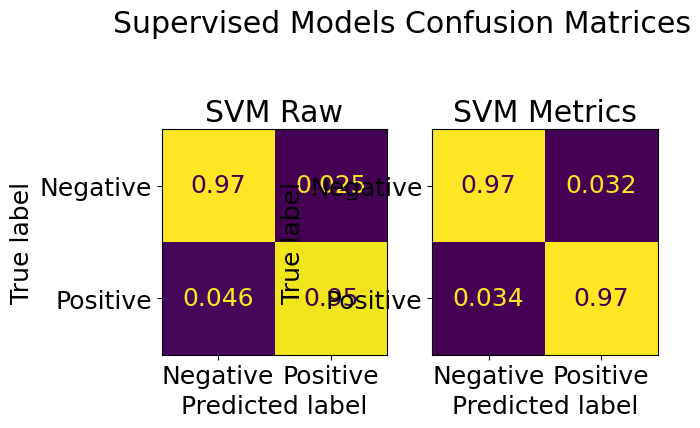

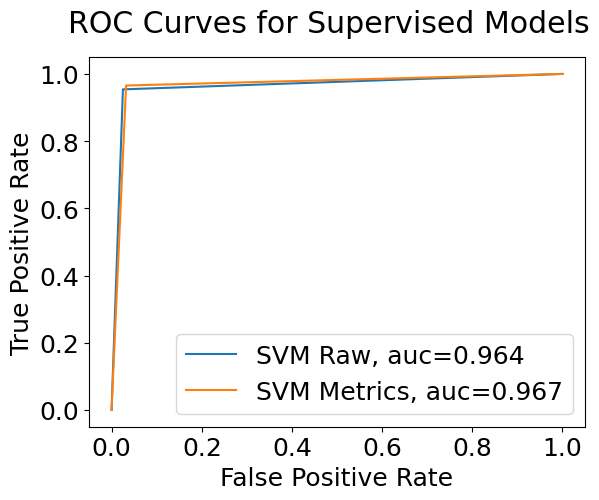

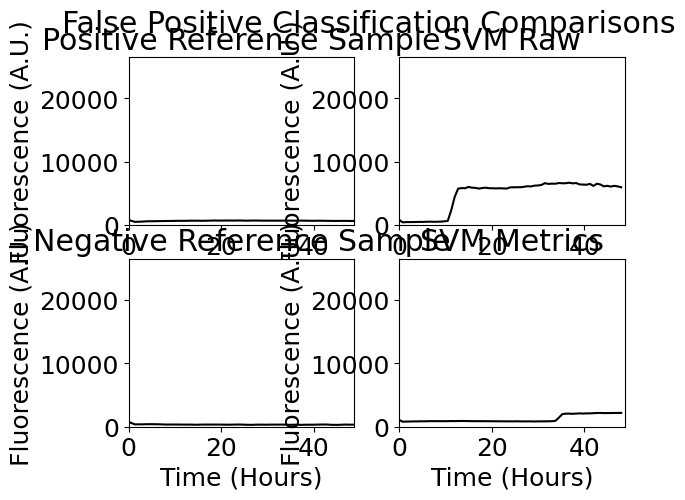

In [17]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

### G-Well Evaluation

In [18]:
#%%
### Test on G Wells
ml_quic = ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir='./Data/BigAnalysisGWells');
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3, file_loc = './TrainTest/GWells')

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

pred_km, sample_list_km = ml_quic.evaluate_replicate_performance(model='KMeans Metrics')
pred_svm_r, sample_list_svmr = ml_quic.evaluate_replicate_performance(model='SVM Raw')
pred_svm_m, sample_list_svmm = ml_quic.evaluate_replicate_performance(model='SVM Metrics')
pred_mlp, sample_list_mlp = ml_quic.evaluate_replicate_performance(model='MLP Raw')

print('Model Sample Predictions:')
print('\n{:20s} {:20s} {:20s} {:20s} {:20s}'.format('Sample:', 'KMeans Metrics:', 'SVM Raw:', 'SVM Metrics:', 'MLP Raw:'))
for i in range(len(pred_km)):
    if sample_list_km[i] != sample_list_mlp[i] or sample_list_mlp[i] != sample_list_svmm[i] or sample_list_svmm[i] != sample_list_svmr[i]:
        raise Exception('Sample order does not agree!')
    print('{:20s} {:20s} {:20s} {:20s} {:20s}'.format(sample_list_km[i], pred_km[i], pred_svm_r[i], pred_svm_m[i], pred_mlp[i]))


Loading Data from ./Data/BigAnalysisGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.src.engine.functional.Functional'>


IndexError: index 4884 is out of bounds for axis 0 with size 304

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Hours')

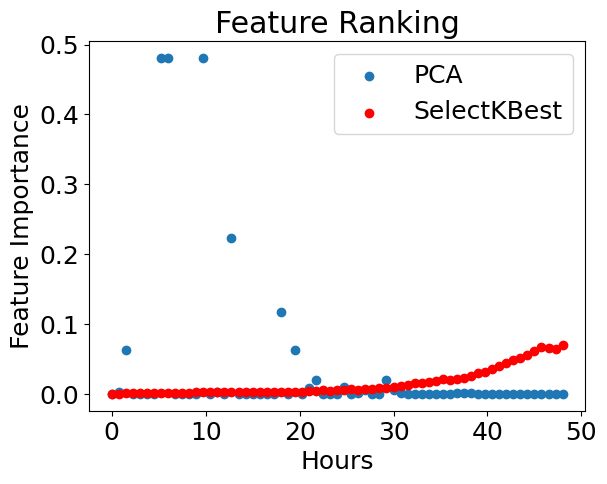

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)) * 0.75, features)
plt.scatter(np.arange(len(features)) * 0.75, skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Hours')